In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.tokenize import RegexpTokenizer, sent_tokenize
import urllib.request
import matplotlib.pyplot as plt
import scipy.optimize as opt
import random
from nltk import ngrams, FreqDist
import nltk
import math
from numpy.random import multinomial
import numpy as np

In [2]:
text_url = r'http://www.gutenberg.org/files/11/11-0.txt'
data =  urllib.request.urlopen(text_url).read()

print ('Book Downloaded!')

Book Downloaded!
Book Downloaded!
Book Downloaded!
Book Downloaded!


In [3]:
## Data variable encoding changed from bytes to string
data = data.decode('utf-8')

## Splitting the corpus into lines for tokenization
data = data.split('\r\n')

In [4]:
## Removing metadata
data = data[data.index('ALICE’S ADVENTURES IN WONDERLAND'):data.index('End of Project Gutenberg’s Alice’s Adventures in Wonderland, by Lewis Carroll')]

In [5]:
## creating the original corpus
data = ' '.join(data)


In [6]:

corpus = sent_tokenize(data)

In [7]:
def lower(s):
    return s.lower()
data = data.strip()
corpus = sent_tokenize(data)
corpus = list(map(lower,corpus))
# print (len(corpus))

In [8]:
# word_corpus = list(map(RegexpTokenizer(str),corpus))
tokenizer = RegexpTokenizer(r'\w+')
word_corpus =[]

for i in corpus:
    word_corpus.append(tokenizer.tokenize(i))

for i in range(len(word_corpus)):
    word_corpus[i].insert(0,'<s>')
    word_corpus[i].append('</s>')


random.shuffle(corpus)    
#print (corpus)
train = corpus[:int(0.8*len(corpus))]
test = corpus[int(0.8*len(corpus)):]

In [9]:
print('Completed Q2!')

Completed Q2!
Completed Q2!
Completed Q2!
Completed Q2!


In [10]:
unigrams = []
bigrams =[]
trigrams=[]

for i in word_corpus:
    unigrams = unigrams + list(ngrams(i,1))
    bigrams = bigrams + list(ngrams(i,2))
    trigrams = trigrams + list(ngrams(i,3))


In [11]:
uni_freq = nltk.FreqDist(unigrams)
bi_freq = nltk.FreqDist(bigrams)
tri_freq = nltk.FreqDist(trigrams)

vocab = len(uni_freq.keys())

In [12]:
tot_uni_count=len(unigrams)
tot_bi_count=len(bigrams)
tot_tri_count=len(trigrams)

mle_uni ={}
mle_bi ={}
mle_tri ={}

for i in uni_freq:
    mle_uni[i] = uni_freq[i]/tot_uni_count
for i in bi_freq:
    #print(i)
    uni = ('%s'%(i[1]),)
    #print(uni)
    mle_bi[i] = bi_freq[i]/uni_freq[uni]
for i in tri_freq:
    bi = ('%s'%(i[0]), '%s'%(i[1]))
    #print(bi)
    mle_tri[i] = tri_freq[i]/bi_freq[bi]
    

In [13]:
print('====== Unigram MLE ======')
test_unigrams=[('the',), ('and',), ('to',), ('a',), ('it',)]
for i in test_unigrams:
    print('MLE for %s unigram is = %.3f'%(i,mle_uni[i]))

print('\n====== Bigram MLE ======')
test_bigrams = [('said', 'the'), ('of', 'the'), ('said', 'alice'), ('in', 'a'), ('and', 'the')]
for i in test_bigrams:
    print('MLE for %s bigram is = %.3f'%(i,mle_bi[i]))

print('\n====== Trigram MLE ======')
test_tri = [('the', 'mock', 'turtle'), ('the', 'march', 'hare'), ('i', 'don', 't'), ('said', 'the', 'king'), ('said', 'the', 'hatter')]
for i in test_tri:
    print('MLE for %s triigram is = %.3f'%(i,mle_tri[i]))



====== Unigram MLE ======
MLE for ('the',) unigram is = 0.056
MLE for ('and',) unigram is = 0.030
MLE for ('to',) unigram is = 0.025
MLE for ('a',) unigram is = 0.022
MLE for ('it',) unigram is = 0.020

====== Bigram MLE ======
MLE for ('said', 'the') bigram is = 0.127
MLE for ('of', 'the') bigram is = 0.081
MLE for ('said', 'alice') bigram is = 0.291
MLE for ('in', 'a') bigram is = 0.153
MLE for ('and', 'the') bigram is = 0.050

====== Trigram MLE ======
MLE for ('the', 'mock', 'turtle') triigram is = 1.000
MLE for ('the', 'march', 'hare') triigram is = 1.000
MLE for ('i', 'don', 't') triigram is = 1.000
MLE for ('said', 'the', 'king') triigram is = 0.139
MLE for ('said', 'the', 'hatter') triigram is = 0.100
====== Unigram MLE ======
MLE for ('the',) unigram is = 0.056
MLE for ('and',) unigram is = 0.030
MLE for ('to',) unigram is = 0.025
MLE for ('a',) unigram is = 0.022
MLE for ('it',) unigram is = 0.020

====== Bigram MLE ======
MLE for ('said', 'the') bigram is = 0.127
MLE for ('o

In [14]:
print('Question 3 done!!')

Question 3 done!!
Question 3 done!!
Question 3 done!!
Question 3 done!!


In [15]:
## Q4-a

def Generator(model_name):
    if model_name not in [1,2,3]:
        print ('Please select "1" or "2" or "3" for the second argument')
        return ('Retry')
    sent = ['<s>']
    if model_name==1:
        for i in range(15):
            lst = list(multinomial(100,list(mle_uni.values())))
            sent = sent + list(unigrams[lst.index(np.max(lst))])
            if unigrams[lst.index(np.max(lst))][0] == '</s>':
                break

    elif model_name==2: 
        for i in range(10):
            lst2={}
            lst22=[]
            for j in bigrams:
                if sent[-1] == j[0]:
                    lst2[j]= mle_bi[j]
                    lst22.append(j)
            
            lst = multinomial(100,[x / sum(list(lst2.values())) for x in list(lst2.values())])
            adding = lst22[np.where(lst == np.max(lst))[0][0]]
            sent = sent + list([adding[1]])
            if adding[1] == '</s>':
                    break

    elif model_name==3:
        
        for i in range(10):
            lst2={}
            lst22=[]
            if i == 0:
                for j in bigrams:
                    if sent[-1] == j[0]:
                        lst2[j]= mle_bi[j]
                        lst22.append(j)

                lst = multinomial(100,[x / sum(list(lst2.values())) for x in list(lst2.values())])
                adding = lst22[np.where(lst == np.max(lst))[0][0]]
                sent = sent + list([adding[1]])
            else:
                for j in trigrams:
                    #print(j[:2])
                    if (sent[-2] == j[0]) and (sent[-1] == j[1]):
                        
                        lst2[j] = mle_tri[j]
                        lst22.append(j)
                lst = multinomial(100,[x / sum(list(lst2.values())) for x in list(lst2.values())])
                adding= lst22[np.where(lst ==np.max(lst))[0][0]]
                sent = sent + list([adding[2]])
            if sent[-1] == '</s>':
                    break

    return(' '.join(sent))

print (Generator(1))
print(Generator(2))
print(Generator(3))

<s> pocket pocket pocket hole time pocket pocket pocket pocket pocket pocket pocket either pocket hole
<s> i could see anything near her lap of your places
<s> pocket pocket pocket hole time pocket pocket pocket pocket pocket pocket pocket either pocket hole
<s> i could see anything near her lap of your places
<s> pocket pocket pocket hole time pocket pocket pocket pocket pocket pocket pocket either pocket hole
<s> i could see anything near her lap of your places
<s> pocket pocket pocket hole time pocket pocket pocket pocket pocket pocket pocket either pocket hole
<s> i could see anything near her lap of your places
<s> there was no one listening this time with one eye
<s> there was no one listening this time with one eye
<s> there was no one listening this time with one eye
<s> there was no one listening this time with one eye


In [16]:
## Q4-b
def Probablity(sentence,model_name):
    if model_name not in [1,2,3]:
        print ('Please select "1" or "2" or "3" for the second argument')
        return ('Retry')
    word_tokens = tokenizer.tokenize(sentence)
    grams = list(ngrams(word_tokens,model_name))
    prob = 1
    if model_name==1:    
        for i in grams:
            prob = prob*mle_uni[i]
    elif model_name==2:    
        for i in grams:
            prob = prob*mle_bi[i]

    elif model_name==3:    
        for i in grams:
            prob = prob*mle_tri[i]

    return(math.log(prob))

for i in test[:10]:
    model_name = random.randint(1,3)
    prob =Probablity(i,model_name)
    print ('\nFollowing sentence \n==> %s \n==> Probability is %.3f in %i-gram model'%(i,prob,model_name))


Following sentence 
==> ‘if i don’t take this child away with me,’ thought alice, ‘they’re sure to kill it in a day or two: wouldn’t it be murder to leave it behind?’ she said the last words out loud, and the little thing grunted in reply (it had left off sneezing by this time). 
==> Probability is -317.786 in 1-gram model
Following sentence 
==> ‘if i don’t take this child away with me,’ thought alice, ‘they’re sure to kill it in a day or two: wouldn’t it be murder to leave it behind?’ she said the last words out loud, and the little thing grunted in reply (it had left off sneezing by this time). 
==> Probability is -317.786 in 1-gram model
Following sentence 
==> ‘if i don’t take this child away with me,’ thought alice, ‘they’re sure to kill it in a day or two: wouldn’t it be murder to leave it behind?’ she said the last words out loud, and the little thing grunted in reply (it had left off sneezing by this time). 
==> Probability is -317.786 in 1-gram model
Following sentence 
==> 

In [17]:
print ('Question 4 Done!!')

Question 4 Done!!
Question 4 Done!!
Question 4 Done!!
Question 4 Done!!


In [18]:
## add-1 smooting
add_smooth={}
for i in bi_freq:
    #print(i)
    uni = ('%s'%(i[1]),)
    #print(uni)
    add_smooth[i] = (bi_freq[i]+1)/(uni_freq[uni]+vocab)



In [19]:
test_set = [('said', 'the'), ('of', 'the'), ('<s>', 'i'), ('said', 'alice')]

for i in test_set:
    print('For %s bigrams:\nMLE Prob       = %.4f\nadd-1 smooting = %.4f'%(i,mle_bi[i],add_smooth[i]))
print('\n===== Explanation for this drastic change =====')
print('This drastic change occurs becuase add-1 smoothing add probabilty mass of 1/vocab to bigrams with zero count')

For ('said', 'the') bigrams:
MLE Prob       = 0.1271
add-1 smooting = 0.0498
For ('of', 'the') bigrams:
MLE Prob       = 0.0809
add-1 smooting = 0.0317
For ('<s>', 'i') bigrams:
MLE Prob       = 0.2155
add-1 smooting = 0.0378
For ('said', 'alice') bigrams:
MLE Prob       = 0.2915
add-1 smooting = 0.0393

===== Explanation for this drastic change =====
This drastic change occurs becuase add-1 smoothing add probabilty mass of 1/vocab to bigrams with zero count
For ('said', 'the') bigrams:
MLE Prob       = 0.1271
add-1 smooting = 0.0498
For ('of', 'the') bigrams:
MLE Prob       = 0.0809
add-1 smooting = 0.0317
For ('<s>', 'i') bigrams:
MLE Prob       = 0.2155
add-1 smooting = 0.0378
For ('said', 'alice') bigrams:
MLE Prob       = 0.2915
add-1 smooting = 0.0393

===== Explanation for this drastic change =====
This drastic change occurs becuase add-1 smoothing add probabilty mass of 1/vocab to bigrams with zero count
For ('said', 'the') bigrams:
MLE Prob       = 0.1271
add-1 smooting = 0.04

In [20]:
print('Question 5 done!!')

Question 5 done!!
Question 5 done!!
Question 5 done!!
Question 5 done!!


In [21]:
lst2 = []
for i in bigrams: 
    if '<s>' in i:
        lst2.append(i)
        

In [22]:
turing={}

for i in bigrams:
    if bi_freq[i] not in turing:
        turing[bi_freq[i]] =0
    turing[bi_freq[i]] +=1

Turing smooting for c=0 is 0.3792
d value (averaged) for turing smoothing is = 0.266
Turing smooting for c=0 is 0.3792
d value (averaged) for turing smoothing is = 0.266
Turing smooting for c=0 is 0.3792
d value (averaged) for turing smoothing is = 0.266
Turing smooting for c=0 is 0.3792
d value (averaged) for turing smoothing is = 0.266


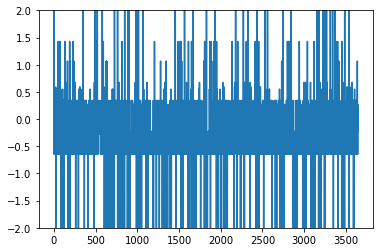

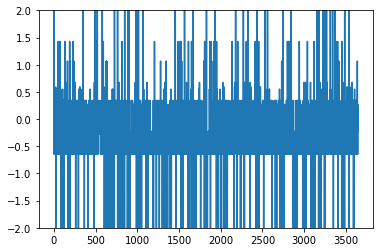

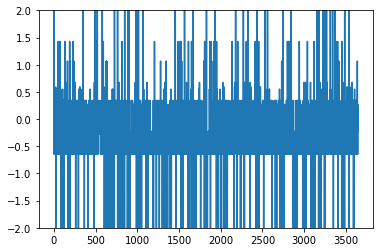

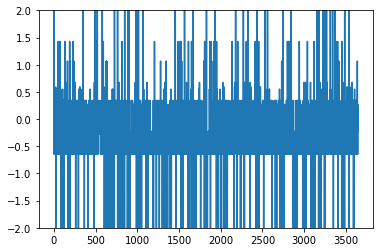

In [23]:
## Turing count for bigrams with upto 31 Nc

turing_count = {}
for i in bigrams:
    nc = bi_freq[i]
    if bi_freq[i] in range(2,31):
        turing_count[i] = (nc+1)*turing[nc+1]
        turing_count[i] =  turing_count[i]/turing[nc]

diff=[]
for i in turing_count:
    diff.append(turing_count[i]-bi_freq[i])

print ('Turing smooting for c=0 is %.4f'%(turing[1]/len(bigrams)))
print('d value (averaged) for turing smoothing is = %.3f'%(-1*sum(diff)/len(diff)))

plt.plot(range(len(diff)),diff)
plt.ylim(-2,2)
plt.show()

In [24]:
print('Question 6 done!!')

Question 6 done!!
Question 6 done!!
Question 6 done!!
Question 6 done!!


In [25]:
## Q7
### Doing for bigram models

mle_add1 ={}
mle_turing ={}
def mle_add1_0(i):
    uni = ('%s'%(i[1]),)
    return 1/(uni_freq[uni]+vocab)

def mle_turing_0 (i):
    return (turing[1]/len(bigrams))
    
for i in turing_count:
    #print(i)
    uni = ('%s'%(i[1]),)
    #print(uni)
    mle_add1[i] = add_smooth[i]/uni_freq[uni]
    

for i in turing_count:
    #print(i)
    uni = ('%s'%(i[1]),)
    #print(uni)
    mle_turing[i] = turing_count[i]/uni_freq[uni]
    

In [26]:
1/vocab

0.00038804811796662784

0.00038804811796662784

0.00038804811796662784

0.00038804811796662784

In [27]:
## Calculating MLE after smoothing
def Probablity_add(sentence,N,model_name=2):
    word_tokens = tokenizer.tokenize(' '.join(sentence))
    grams = list(ngrams(word_tokens,2))
    prob = 1
    for i in grams:
        if i in mle_add1:
            prob = prob*((1/mle_add1[i])**(1/N))
        else:
            prob = prob*((1/0.03880)**(1/N))
    return (prob)


def Probablity_turing(sentence,N,model_name=2):
    word_tokens = tokenizer.tokenize(' '.join(sentence))
    grams = list(ngrams(word_tokens,2))
    prob = 1
    for i in grams:
        if i in mle_turing:
            prob = prob*((1/mle_turing[i])**(1/N))
        else:
            prob = prob*((1/0.379)**(1/N))
    return (prob)

In [28]:
perplx_add=1.0
perplx_turing =1.0

word_tokens = tokenizer.tokenize(" ".join(test)) 
grams = list(ngrams(word_tokens,1))
N= len(grams)

for i in test[:20]:
    perplx_add = perplx_add*Probablity_add(test,N)
    perplx_turing = perplx_turing*Probablity_turing(test,N)


print ('Perplexity value for add-1 smoothing for the entire test dataset is %.2f'%(perplx_add**(-1/N)))
print ('Perplexity value for Good Turing smoothing for the test dataset is %.2f'%(perplx_turing))
    
    



Perplexity value for add-1 smoothing for the entire test dataset is 0.97
Perplexity value for Good Turing smoothing for the test dataset is 268001498592253344.00
Perplexity value for add-1 smoothing for the entire test dataset is 0.97
Perplexity value for Good Turing smoothing for the test dataset is 268001498592253344.00
Perplexity value for add-1 smoothing for the entire test dataset is 0.97
Perplexity value for Good Turing smoothing for the test dataset is 268001498592253344.00
Perplexity value for add-1 smoothing for the entire test dataset is 0.97
Perplexity value for Good Turing smoothing for the test dataset is 268001498592253344.00


In [29]:
print('Question 7 done!!')

Question 7 done!!
Question 7 done!!
Question 7 done!!
Question 7 done!!


# References
1. Data downloading: https://stackoverflow.com/a/7244263
2. Curve fitting in scipy: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.curve_fit.html
3. Zipf's plot for meaning discussed with Arik Pamnani
4. https://stackoverflow.com/a/36798898/7630458 for freq distribution of n grams
5. https://stackoverflow.com/a/15555162/7630458 For regex tokenizer
6. https://courses.engr.illinois.edu/cs447/fa2017/Slides/Lecture04.pdf for add-1 smoothing